# Airline Passenger Satisfaction Prediction

### Import Spark Module

In [ ]:
import os
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.1'
spark_version = 'spark-3.0.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:15 http

In [ ]:

# Download the Postgres driver that will allow Spark to interact with Postgres.
!wget https://jdbc.postgresql.org/download/postgresql-42.2.16.jar

--2021-02-08 03:16:19--  https://jdbc.postgresql.org/download/postgresql-42.2.16.jar
Resolving jdbc.postgresql.org (jdbc.postgresql.org)... 72.32.157.228, 2001:4800:3e1:1::228
Connecting to jdbc.postgresql.org (jdbc.postgresql.org)|72.32.157.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1002883 (979K) [application/java-archive]
Saving to: ‘postgresql-42.2.16.jar.2’

postgresql-42.2.16. 100%[===================>] 979.38K  --.-KB/s    in 0.08s   

2021-02-08 03:16:20 (11.5 MB/s) - ‘postgresql-42.2.16.jar.2’ saved [1002883/1002883]



In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("datafinal").config("spark.driver.extraClassPath","/content/postgresql-42.2.16.jar").getOrCreate()

##  Spark DataFrames and ETL process

In [ ]:
# Read in data from S3 Buckets
from pyspark import SparkFiles
url ="https://reno8946-bucket.s3.us-east-2.amazonaws.com/test.csv"
spark.sparkContext.addFile(url)
test_df = spark.read.csv(SparkFiles.get("test.csv"), sep=",", header=True, inferSchema=True)

# Show DataFrame
test_df.show()

+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+
|_c0|    id|Gender|    Customer Type|Age| Type of Travel|   Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|        satisfaction|
+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+-

In [ ]:
# Read in data from S3 Buckets
from pyspark import SparkFiles
url ="https://reno8946-bucket.s3.us-east-2.amazonaws.com/train.csv"
spark.sparkContext.addFile(url)
train_df = spark.read.csv(SparkFiles.get("train.csv"), sep=",", header=True, inferSchema=True)

# Show DataFrame
train_df.show()

+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+
|_c0|    id|Gender|    Customer Type|Age| Type of Travel|   Class|Flight Distance|Inflight wifi service|Departure/Arrival time convenient|Ease of Online booking|Gate location|Food and drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure Delay in Minutes|Arrival Delay in Minutes|        satisfaction|
+---+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+-

In [ ]:
# Rename columns for train_df
train_df=train_df.withColumnRenamed("Food and drink", "Food_and_drink").withColumnRenamed("Type of Travel", "Type_of_Travel").withColumnRenamed("Departure/Arrival time convenient", "Departure/Arrival_time_convenient").withColumnRenamed("Ease of Online booking", "Ease_of_Online booking").withColumnRenamed("Gate location", "Gate_location").withColumnRenamed("Departure Delay in Minutes", "Departure_Delay_in_Minutes").withColumnRenamed("Arrival Delay in Minutes", "Arrival_Delay_in_Minutes").withColumnRenamed("Customer Type", "Customer").withColumnRenamed("Inflight wifi service", "Inflight wifi")
test_df=test_df.withColumnRenamed("Food and drink", "Food_and_drink").withColumnRenamed("Type of Travel", "Type_of_Travel").withColumnRenamed("Departure/Arrival time convenient", "Departure/Arrival_time_convenient").withColumnRenamed("Ease of Online booking", "Ease_of_Online booking").withColumnRenamed("Gate location", "Gate_location").withColumnRenamed("Departure Delay in Minutes", "Departure_Delay_in_Minutes").withColumnRenamed("Arrival Delay in Minutes", "Arrival_Delay_in_Minutes").withColumnRenamed("Customer Type", "Customer").withColumnRenamed("Inflight wifi service", "Inflight wifi")
test_df.show()

+---+------+------+-----------------+---+---------------+--------+---------------+-------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+
|_c0|    id|Gender|         Customer|Age| Type_of_Travel|   Class|Flight Distance|Inflight wifi|Departure/Arrival_time_convenient|Ease_of_Online booking|Gate_location|Food_and_drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure_Delay_in_Minutes|Arrival_Delay_in_Minutes|        satisfaction|
+---+------+------+-----------------+---+---------------+--------+---------------+-------------+---------------------------------+----------------------+-------------+--------------+----------

In [ ]:
# Drop NAs for train_df
train_df=train_df.dropna()
# Drop NAs for test_df
test_df=test_df.dropna()

# Drop index and id columns for train_df
train_df=train_df.drop('_c0','id')
# Drop index and id columns for test_df
test_df=test_df.drop('_c0','id')
test_df.show()

+------+-----------------+---+---------------+--------+---------------+-------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+
|Gender|         Customer|Age| Type_of_Travel|   Class|Flight Distance|Inflight wifi|Departure/Arrival_time_convenient|Ease_of_Online booking|Gate_location|Food_and_drink|Online boarding|Seat comfort|Inflight entertainment|On-board service|Leg room service|Baggage handling|Checkin service|Inflight service|Cleanliness|Departure_Delay_in_Minutes|Arrival_Delay_in_Minutes|        satisfaction|
+------+-----------------+---+---------------+--------+---------------+-------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+--------------

In [ ]:
# Total number of rows for train_df
train_df.count()

103594

In [ ]:
# Total number of rows for test_df
test_df.count()

25893

In [ ]:
# Configure settings for RDS
mode = "append"
jdbc_url="jdbc:postgresql://datafinal.c50h51d04cbn.us-east-2.rds.amazonaws.com:5432/postgres"
config = {"user":"postgres",
          "password": "password",
          "driver":"org.postgresql.Driver"}

In [ ]:
# Write train_df to active_user table in RDS
train_df.write.jdbc(url=jdbc_url, table='train', mode=mode, properties=config)

# Write test_df to active_user table in RDS
test_df.write.jdbc(url=jdbc_url, table='test', mode=mode, properties=config)

## Import Data from SQL using sqlalchemy

In [1]:
import warnings
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# follows django database settings format, replace with your own settings
DATABASES = {
    'datafinal':{
        'POSTGRES_DBNAME': 'postgres',
        'POSTGRES_USERNAME': 'postgres',
        'POSTGRES_PASSWORD': '',
        'POSTGRES_ADDRESS': 'datafinal.c50h51d04cbn.us-east-2.rds.amazonaws.com',
        'POSTGRES_PORT': 5432,
    },
}

# choose the database to use
db = DATABASES['datafinal']

# construct an engine connection string
engine_string =  ('postgresql+psycopg2://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username= db['POSTGRES_USERNAME'],
                      password= db['POSTGRES_PASSWORD'],
                      ipaddress= db['POSTGRES_ADDRESS'],
                      port= db['POSTGRES_PORT'],
                      dbname= db['POSTGRES_DBNAME'])
               )

# create sqlalchemy engine
engine = create_engine(engine_string)

# read a table from database into pandas dataframe, replace "tablename" with your table name
df = pd.read_sql_table('mergedtable', engine)
df.head()

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52.0,Business travel,Eco,160.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,satisfied
1,Female,Loyal Customer,36.0,Business travel,Business,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,satisfied
2,Male,disloyal Customer,20.0,Business travel,Eco,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44.0,Business travel,Business,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,satisfied
4,Female,Loyal Customer,49.0,Business travel,Eco,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,satisfied


In [3]:
df.isnull().sum()

Gender                               0
Customer                             0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi                        0
Departure/Arrival_time_convenient    0
Ease_of_Online booking               0
Gate_location                        0
Food_and_drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492055 entries, 0 to 492054
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             492055 non-null  object 
 1   Customer                           492055 non-null  object 
 2   Age                                492055 non-null  float64
 3   Type_of_Travel                     492055 non-null  object 
 4   Class                              492055 non-null  object 
 5   Flight Distance                    492055 non-null  float64
 6   Inflight wifi                      492055 non-null  float64
 7   Departure/Arrival_time_convenient  492055 non-null  float64
 8   Ease_of_Online booking             492055 non-null  float64
 9   Gate_location                      492055 non-null  float64
 10  Food_and_drink                     492055 non-null  float64
 11  Online boarding                    4920

In [39]:
# label encoder's fit_transform() method is used to first train the label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df.copy()
df2['Gender'] = le.fit_transform(df2['Gender'])
df2['Customer'] = le.fit_transform(df2['Customer'])
df2['Type_of_Travel'] = le.fit_transform(df2['Type_of_Travel'])
df2['Class'] = le.fit_transform(df2['Class' ])
df2['satisfaction'] = le.fit_transform(df2[ 'satisfaction'])
df2.head(10)

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,0,52.0,0,1,160.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,1
1,0,0,36.0,0,0,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,1
2,1,1,20.0,0,1,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,0
3,1,0,44.0,0,0,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,1
4,0,0,49.0,0,1,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,1
5,1,0,16.0,0,1,311.0,3.0,3.0,3.0,3.0,5.0,5.0,3.0,5.0,4.0,3.0,1.0,1.0,2.0,5.0,0.0,0.0,1
6,0,0,77.0,0,0,3987.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,0.0,0.0,1
7,0,0,43.0,0,0,2556.0,2.0,2.0,2.0,2.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,77.0,65.0,1
8,1,0,47.0,0,1,556.0,5.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,2.0,2.0,5.0,3.0,3.0,5.0,1.0,0.0,1
9,0,0,46.0,0,0,1744.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,28.0,14.0,1


In [40]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

##  Filter-Based Feature Selection Methods

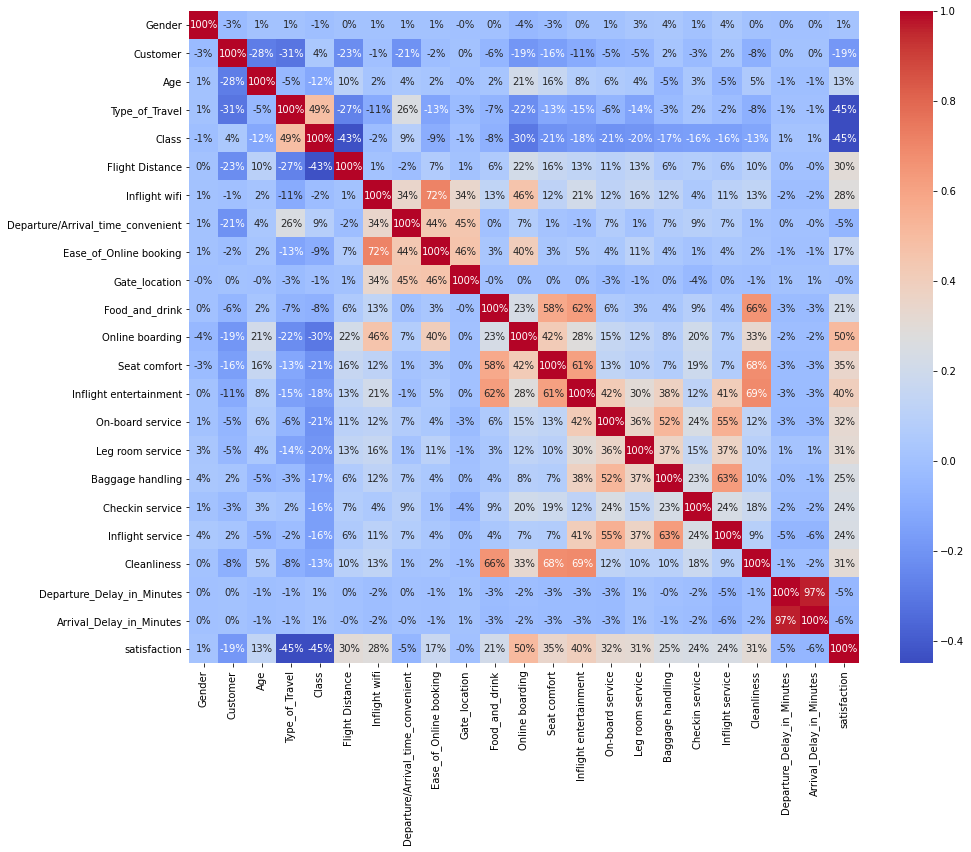

In [ ]:
# A glance at the correlations
ax = plt.figure(figsize=(15,12))
sns.heatmap(df2.corr(),annot=True,cmap="coolwarm",fmt='.0%')
plt.show()

In [ ]:
df2 = df2.drop(["Gender", "Gate_location"], axis=1)

<Figure size 1080x864 with 0 Axes>

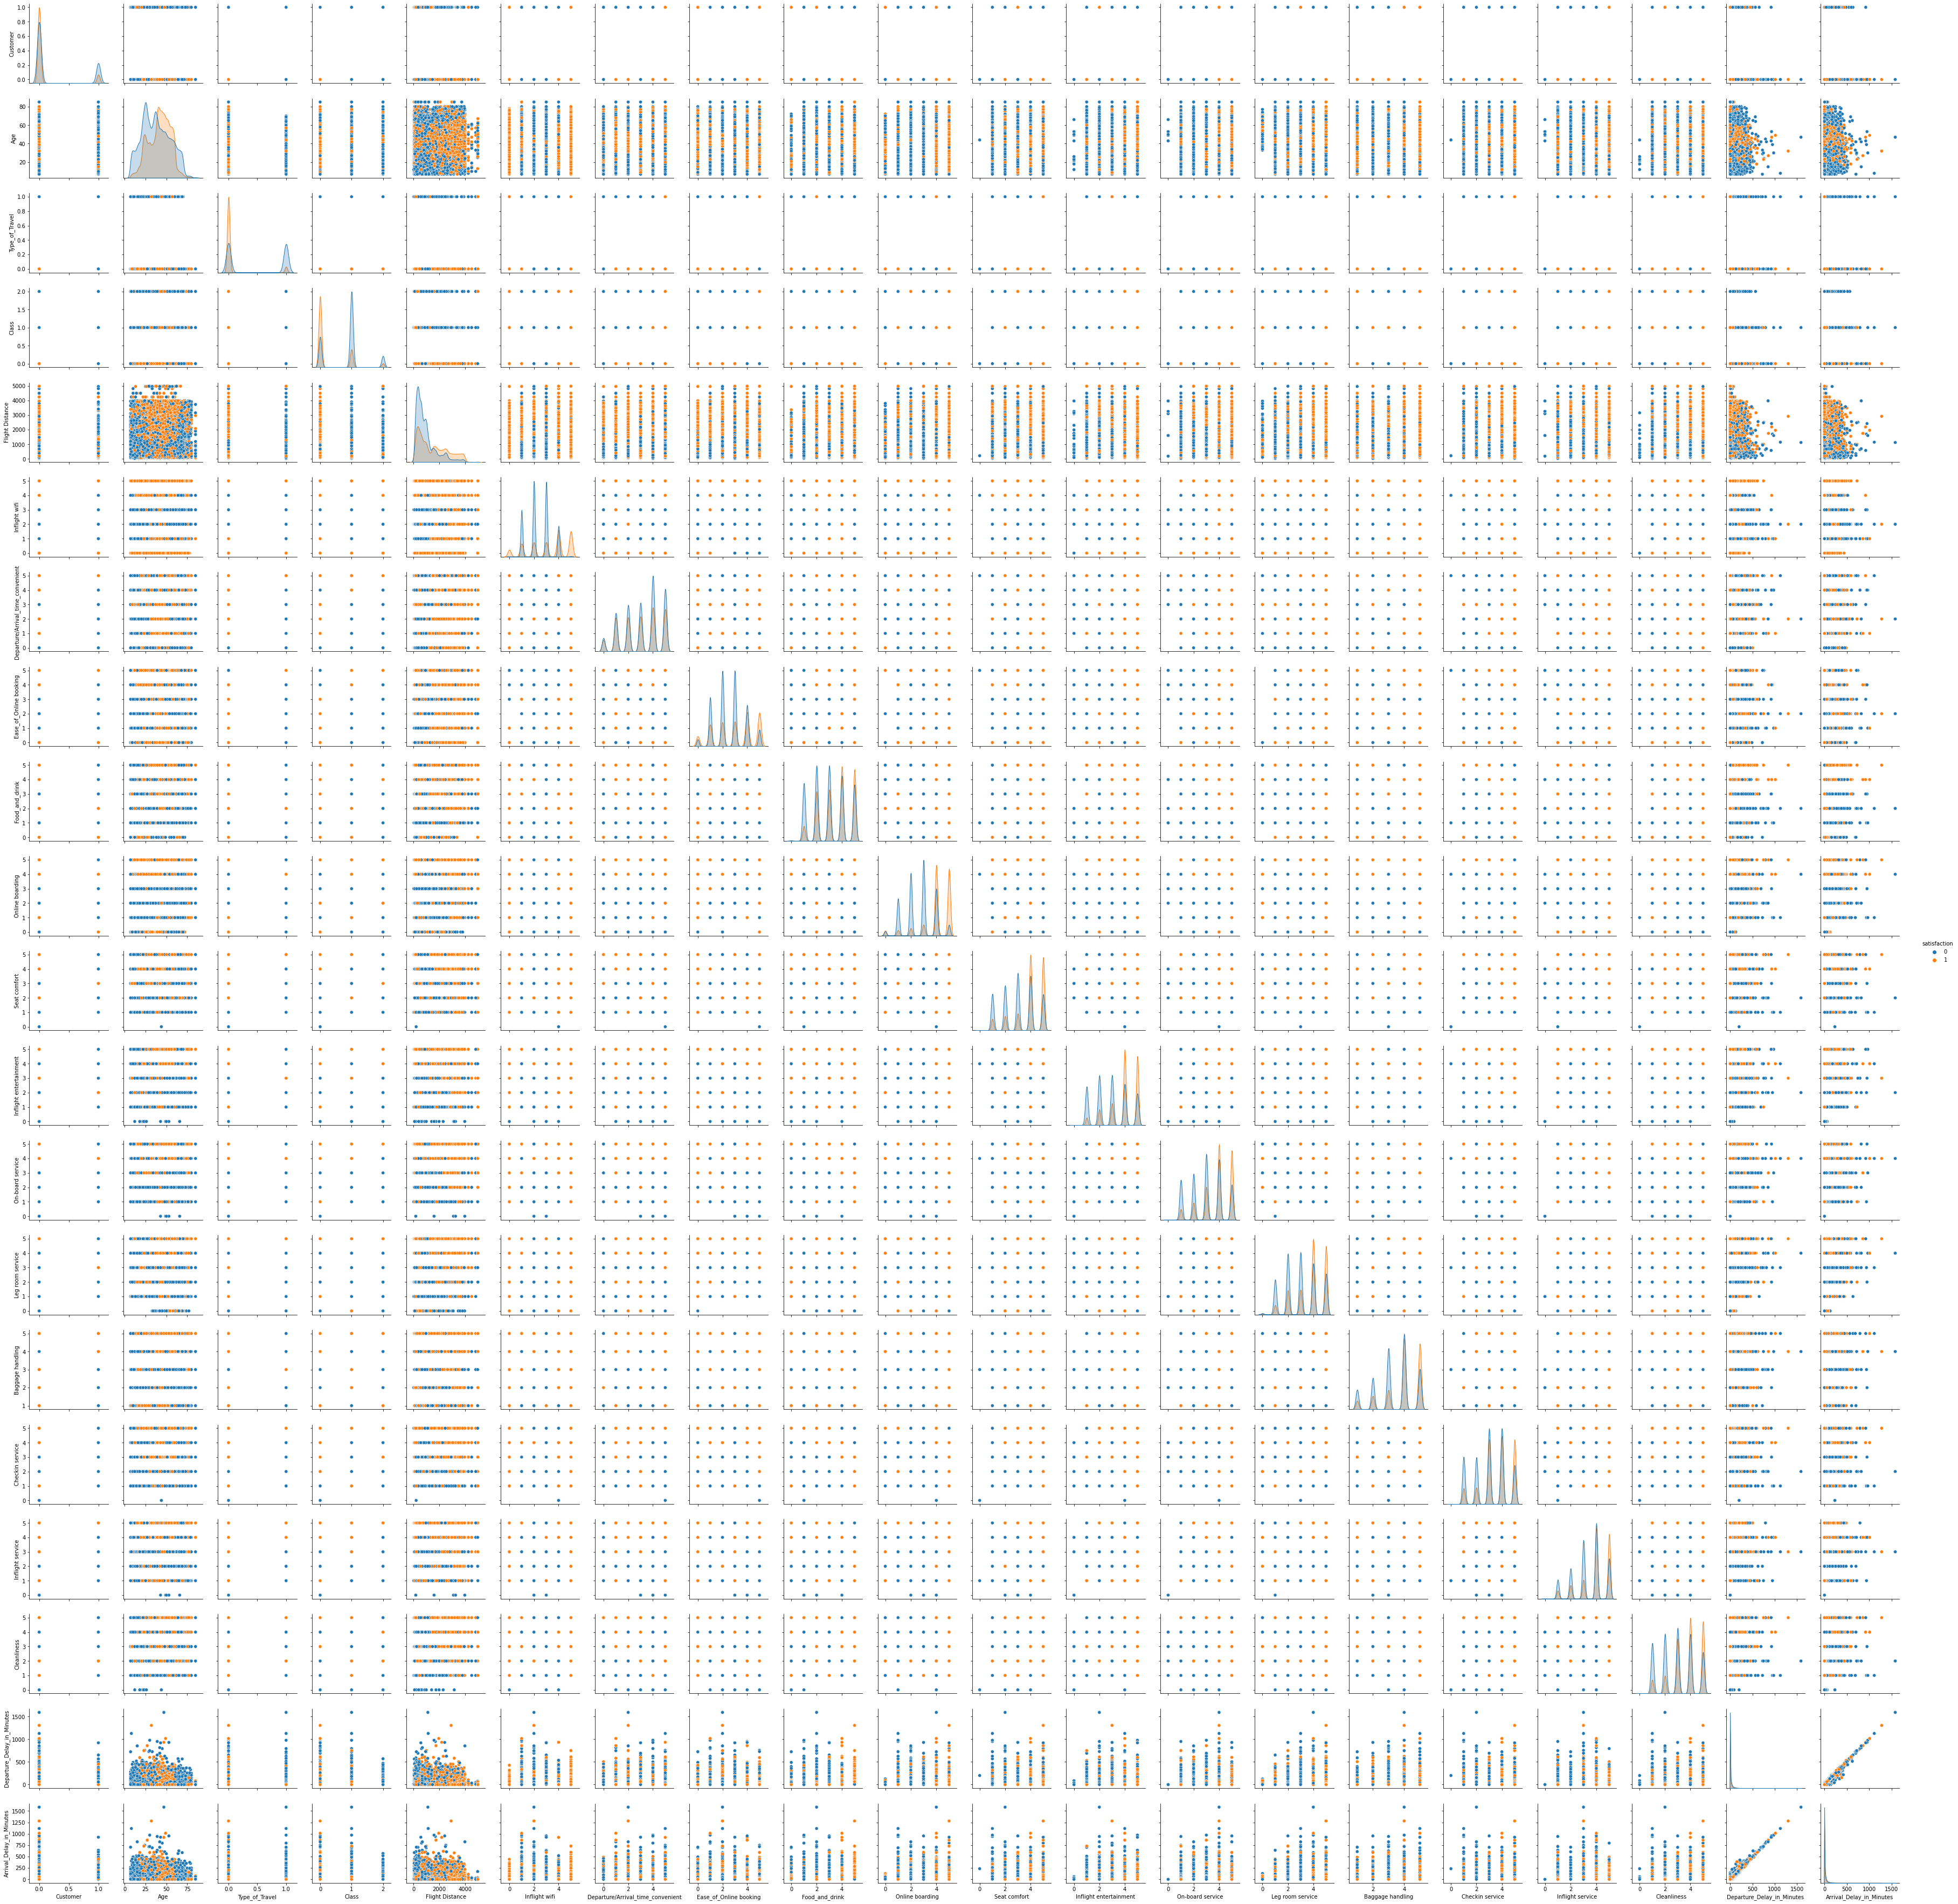

In [ ]:
# A glance at the correlations
ax = plt.figure(figsize=(15,12))
sns.pairplot(df2, hue="satisfaction")
plt.show()

In [41]:
df.columns

Index(['Gender', 'Customer', 'Age', 'Type_of_Travel', 'Class',
       'Flight Distance', 'Inflight wifi', 'Departure/Arrival_time_convenient',
       'Ease_of_Online booking', 'Gate_location', 'Food_and_drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
df3 = df.copy()
X = df3.drop(["Gender", "Gate_location", "Arrival_Delay_in_Minutes", "satisfaction"], axis=1)
X2 = df[['Customer', 'Type_of_Travel', 'Class']]
y = df[['satisfaction']]
X.head()

,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes
0,Loyal Customer,52.0,Business travel,Eco,160.0,5.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0
1,Loyal Customer,36.0,Business travel,Business,2863.0,1.0,1.0,3.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0
2,disloyal Customer,20.0,Business travel,Eco,192.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0
3,Loyal Customer,44.0,Business travel,Business,3377.0,0.0,0.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0
4,Loyal Customer,49.0,Business travel,Eco,1182.0,2.0,3.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0


In [53]:
X.columns

Index(['Customer', 'Age', 'Type_of_Travel', 'Class', 'Flight Distance',
       'Inflight wifi', 'Departure/Arrival_time_convenient',
       'Ease_of_Online booking', 'Food_and_drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure_Delay_in_Minutes'],
      dtype='object')

##  Import sklearn's module

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config

In [ ]:
# help(make_column_selector)

## Setup the pipeline

In [8]:
#create the preprocessing pipelines for both numeric and categorical data. 
# Setup the numerical_features and cartegorical features
numeric_features = [ 'Age', 'Flight Distance',
       'Inflight wifi', 'Departure/Arrival_time_convenient',
       'Ease_of_Online booking', 'Food_and_drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'Departure_Delay_in_Minutes']

categorical_features = ['Customer', 'Type_of_Travel', 'Class',]

In [13]:
# Numeric transforamation by SimpleImputer and StandardScaler
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# categorical transformation by OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


# Setup the columntransformer using two numeric and categorical transformer
# we can use the sklearn.compose, make_column_selector, but it gives error
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('catategorical', categorical_transformer, categorical_features)])

In [14]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

## ML running using the Logistic REgression model

In [15]:
# Split the dataset with 20% test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

# Training the dataset using LogisticRegression()
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


model score: 0.875


In [ ]:
#!pip install --upgrade scikit-learn

In [16]:
from sklearn import set_config

set_config(display = 'diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Inflight wifi',
                                                   'Departure/Arrival_time_convenient',
                                                   'Ease_of_Online booking',
                                                   'Food_and_drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure_Delay_in_Minutes']),
                                                 ('catategorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Customer', 'Type_of_Travel',
                                                   'Class'])])),
                ('classifier', LogisticRegression())])